<a href="https://colab.research.google.com/github/Petrichoeur/TER/blob/master/utilitaires/Traitement_donnees_madeleine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Traitement des données Madeleine

---

Madeleine est née le 14 avril 2005. Sa mère dirige une société de production et son père est cadre supérieur dans une entreprise de restauration industrielle. Elle est le deuxième enfant de la famille et au début du tournage, sa sœur est de onze ans son aînée.

Martine Sékali la filme en situation naturelle, chez elle, une heure par mois depuis l’âge de 1 ans et 5 jours, et tous les trois mois depuis l’âge de 4 ans.

Madeleine est une petite fille très bavarde dont le développement langagier peut-être qualifié d’impressionnant. En effet, elle utilise dès l’âge de 2;02 un lexique très précis, des marqueurs grammaticaux, des prépositions, des conjonctions ainsi que des déterminants variés. Elle est aussi capable de faire des plaisanteries, raconter des histoires, décrire ses actions et maîtrise plusieurs temps et aspects. A cinq ans, Madeleine entre au CP, elle sait déjà lire et est très sociable et joyeuse. Elle a désormais un petit frère très vif et dynamique de 3 ans, Côme, qui vient d’entrer en maternelle, et avec qui elle échange et joue volontiers.

# Nettoyage 

## Chargement des données

Récupèrer la liste des noms de fichier pour Madeleine :
* Ces fichiers sont placés dans un repertoire 'data/madeleine_texte'
* Ils sont issuent d'une extraction sur le site colaje au format chat
* Nous les avons transformés en format .txt afin de pouvoir les traiter avec python

In [0]:
import os 
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import chardet

In [0]:
print(os.getcwd())
os.chdir('/Users/marine/Desktop/Projet_TER/data/madeleine_texte')
listing=os.listdir() # On crée une liste de tout les noms des fichiers

/Users/marine/Desktop


In [0]:
listing.sort()
listing

['.DS_Store',
 'MADELEINE-02-1_00_05.txt',
 'MADELEINE-03-1_01_10.txt',
 'MADELEINE-04-1_02_14.txt',
 'MADELEINE-05-1_02_28.txt',
 'MADELEINE-06-1_03_18.txt',
 'MADELEINE-07-1_04_18.txt',
 'MADELEINE-08-1_06_04.txt',
 'MADELEINE-09-1_07_15.txt',
 'MADELEINE-10-1_09_03.txt',
 'MADELEINE-11-1_10_07.txt',
 'MADELEINE-12-1_11_13.txt',
 'MADELEINE-13-2_01_02.txt',
 'MADELEINE-14-2_02_06.txt',
 'MADELEINE-15-2_03_05.txt',
 'MADELEINE-16-2_04_15.txt',
 'MADELEINE-17-2_05_12.txt',
 'MADELEINE-18-2_06_10.txt',
 'MADELEINE-19-2_07_07.txt',
 'MADELEINE-20-2_08_05.txt',
 'MADELEINE-21-2_09_16.txt',
 'MADELEINE-22-2_10_20.txt',
 'MADELEINE-23-2_11_19.txt',
 'MADELEINE-24-3_00_28.txt',
 'MADELEINE-25-3_03_02.txt',
 'MADELEINE-26-3_06_08.txt',
 'MADELEINE-27-3_09_07.txt',
 'MADELEINE-28-3_09_28.txt',
 'MADELEINE-29-4_01_27.txt',
 'MADELEINE-30-4_07_04.txt',
 'MADELEINE-31-4_10_03.txt',
 'MADELEINE-32-5_01_05.txt',
 'MADELEINE-33-5_05_08.txt',
 'MADELEINE-34-5_10_16.txt',
 'MADELEINE-35-6_05_14.txt',


In [0]:
del listing[0] # pour retirer '.DS_Store'
len(listing)

35

Nous avons 35 fichiers pour Madeleine, chacun de ses fichiers corresepondent aux retrancriptions d'un enregistrement vidéo.


## Lecture des données

* Définir le nom des colonnes selon le fichier final attendu
* Lire chaque fichier de la liste 
* Ajouter les colonnes nom de l'enfant et son age
* La colonne age identifie de manière unique l'enregistrement

In [0]:
d = {} # Le dictionnaire contenant les noms des fichiers
nom_col = ['type', 'seconde_debut', 'seconde_fin', 'contenu']
rows = 0 #Compteur de ligne pour vérifier la perte de données

for file in listing: 
    d[file]=pd.read_csv(file, 
                        sep = '\t', 
                        names = nom_col, 
                        header = None)  

    # On ajoute le nom de l'enfant
    nom_pos1 = 0
    nom_pos2 = file.find('-')
    nom = file[nom_pos1:nom_pos2]
    d[file]['enfant'] = nom
    
    # On ajoute l'age de l'enfant
    age_pos1 = file.find('_')-1
    age_pos2 = file.find('.')
    age = file[age_pos1:age_pos2]
    d[file]['age'] = age
    
    rows += len(d[file])
    
    
# DataFrame contenant toutes les lignes de l'enfant
data = pd.concat([d[file] for file in listing], 
                 sort=False,
                 ignore_index=True) 

In [0]:
data.shape

(105459, 6)

## Vérification de la perte de données

On vérifie qu'il y a autant de ligne lu (variable rows) que de ligne écritent (len(data))

In [0]:
print(rows == len(data))

True


## Ordre des colonnes

In [0]:
data=data[['enfant', 'age','type', 'seconde_debut', 'seconde_fin', 'contenu']]
data.head()

,enfant,age,type,seconde_debut,seconde_fin,contenu
0,MADELEINE,1_00_05,+div+,0,3603.0,div |
1,MADELEINE,1_00_05,+div+,0,58.0,div |
2,MADELEINE,1_00_05,MOT,0,2.0,c'est pas très propre ça .
3,MADELEINE,1_00_05,act,NaN,NaN,MOT penchée regarde CHI .
4,MADELEINE,1_00_05,MOT,2,3.0,allez debout .


## Création du fichier final format csv

In [0]:
# Création du fichier enfant
os.chdir('/Users/marine/Desktop/Projet_TER/TER/data')
data.to_csv('data_madeleine_final.csv',
           encoding = 'utf-8',
           sep = '\t',
           header = True)

On peut maintenant utiliser le fichier 'data_madeleine_finale.csv' pour l'exploration de données.

## Lecture fichier final

In [0]:
data_madeleine = pd.read_csv('data_madeleine_final.csv',
                           sep = '\t',
                           encoding = 'utf-8',
                           index_col=False)

# On supprime la colonne qui duplique les index
data_madeleine = data_madeleine.drop(columns = 'Unnamed: 0')

In [0]:
data_madeleine

,enfant,age,type,seconde_debut,seconde_fin,contenu
0,MADELEINE,1_00_05,+div+,0.0,3603.0,div |
1,MADELEINE,1_00_05,+div+,0.0,58.0,div |
2,MADELEINE,1_00_05,MOT,0.0,2.0,c'est pas très propre ça .
3,MADELEINE,1_00_05,act,NaN,NaN,MOT penchée regarde CHI .
4,MADELEINE,1_00_05,MOT,2.0,3.0,allez debout .
5,MADELEINE,1_00_05,act,NaN,NaN,MOT attrape CHI par les deux mains pour la rel...
6,MADELEINE,1_00_05,OBS,3.0,4.0,bonjour Madeleine !
7,MADELEINE,1_00_05,CHI,4.0,4.0,0 .
8,MADELEINE,1_00_05,act,NaN,NaN,CHI regarde OBS .
9,MADELEINE,1_00_05,MAR,4.0,5.0,ah [=! sourit] .


# Exploration des données

---

Qu'elles sont les différents type de ligne ?

In [0]:
print(len(data_madeleine['type'].unique()))

40


Il existe 40 types de ligne dans les fichiers Madeleine :

In [0]:
print(sorted(data_madeleine['type'].unique()))

['+div+', '-div-', 'ANG', 'CAM', 'CHI', 'CHR', 'COM', 'FAT', 'FRI', 'HOU', 'LUC', 'MAR', 'MOT', 'OBS', 'SIS', 'TOY', 'UNI', 'VAL', 'VIS', 'VOI', 'act', 'add', 'cod', 'com', 'com¬:', 'dis', 'disc', 'exp', 'fac', 'fic', 'gpx', 'int', 'mod', 'nof', 'pho', 'sit', 'ximi', 'xnpt', 'xpnt', 'xpol']


## Les phonèmes

Les lignes de type 'pho' correspondent à la traduction phonétique lorsque Madeleine s'exprime :
* Nous avons à disposition 14614 traductions pour Madeleine
* On distingue les premiers mots de Madeleine à l'age d'un an et 5 jours
* Les traductions s'arrêtent à l'age de 6 ans 11 mois et 27 jours

In [0]:
pho_madeleine = data_madeleine[data_madeleine['type'] == 'pho']
pho_madeleine

,enfant,age,type,seconde_debut,seconde_fin,contenu
25,MADELEINE,1_00_05,pho,NaN,NaN,eː
38,MADELEINE,1_00_05,pho,NaN,NaN,bɛ
62,MADELEINE,1_00_05,pho,NaN,NaN,vœga
105,MADELEINE,1_00_05,pho,NaN,NaN,gatœ̃
120,MADELEINE,1_00_05,pho,NaN,NaN,kaka
150,MADELEINE,1_00_05,pho,NaN,NaN,dœjøkɛka
172,MADELEINE,1_00_05,pho,NaN,NaN,m
178,MADELEINE,1_00_05,pho,NaN,NaN,taka
183,MADELEINE,1_00_05,pho,NaN,NaN,dɛka
209,MADELEINE,1_00_05,pho,NaN,NaN,gøgega


In [0]:
#mad = data_madeleine['type'].unique()
#mad.sort()
#type_madeleine = {}
#for file in mad:
#    type_madeleine[file] = len(data_madeleine[data_madeleine['type'] == file])
#type_madeleine

Nous allons chercher à visualiser la quantité phonétique de données à disposition

## Visualisation des données phonétiques

### Ajout des colonnes 'année', 'mois' et 'jour'

On considère que la colonne age a pout format : x_xx_xx (année_mois_jour) ainsi :
* ``pho_madeleine['age'][0:1]`` nous donne le nombre d'année
* ``pho_madeleine['age'][2:4]`` nous donne le nombre de mois
* ``pho_madeleine['age'][5:7]`` nous donne le nombre de jours

In [0]:
# Ajout du nombre d'année
année_pho_madeleine = pho_madeleine.apply(lambda row: row['age'][0:1], axis=1)
pho_madeleine['année'] = année_pho_madeleine

# Ajout du nombre de mois
mois_pho_madeleine = pho_madeleine.apply(lambda row: row['age'][2:4], axis=1)
pho_madeleine['mois'] = mois_pho_madeleine

# Ajout du nombre de jour
jour_pho_madeleine = pho_madeleine.apply(lambda row: row['age'][5:7], axis=1)
pho_madeleine['jour'] = jour_pho_madeleine

In [0]:
#pho_madeleine

## Quantité de données

Combien avons-nous de ligne pour chaque année ? mois ? jour ?

### Quantité de données par année

In [0]:
nb_phrase_annee = pho_madeleine[{'année','contenu'}].groupby('année').count()
nb_phrase_annee.rename(columns={'contenu': 'nb_phrase'})

,nb_phrase
année,
1,4270
2,5390
3,2566
4,1962
5,410
6,16


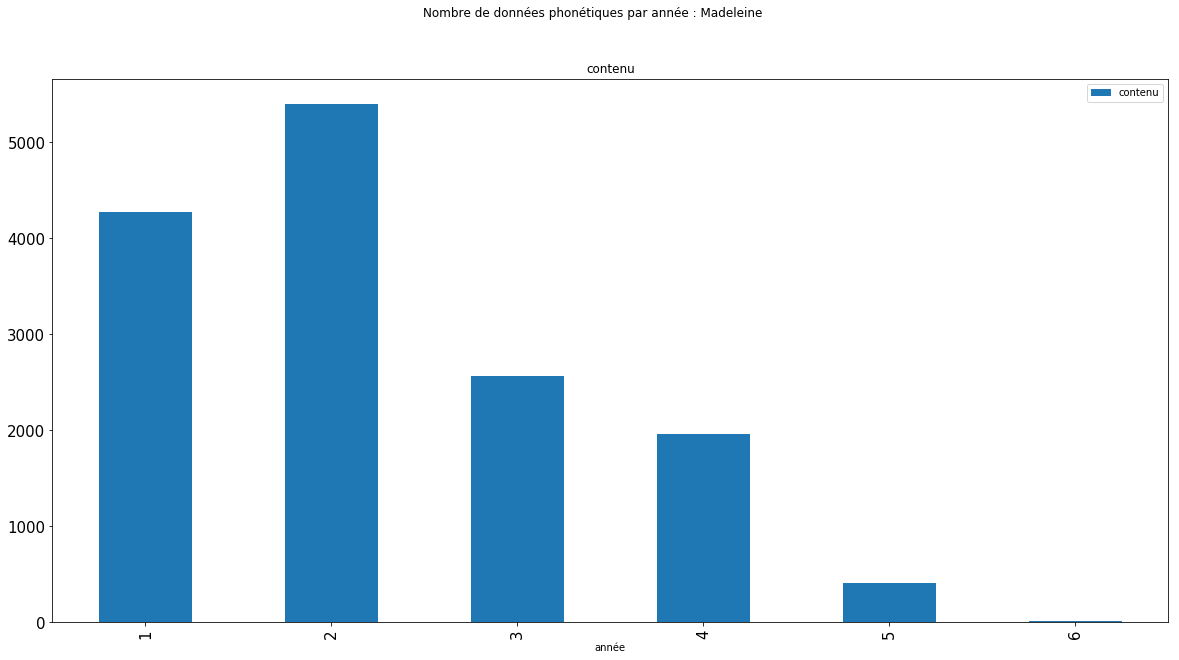

In [0]:
nb_phrase_annee.plot(kind='bar', 
                       subplots=True, 
                       figsize=(20,10),
                       title = 'Nombre de données phonétiques par année : Madeleine',
                       fontsize = 15,
                       use_index = True);

On voit qu'il y a des quantités de données phonétiques différentes pour chaques années :
* Il y a un riche contenue des la premiere annee
* Le pic de données phonétiques se situe a l'age de 2 ans
* La quantité de données diminue a partir de 2 ans, pourtant les nombre d'enregistrments ne diminue qu'a l'age de 4 ans
* Peut-on considérer la sixième année comme n'ayant aucune donnée ?

### Quantité de données par mois

Regardons plus en détail la quantité de données phonétiques par mois :

In [0]:
nb_phrase_mois = pho_madeleine[{'année','mois','contenu'}].groupby(['année','mois']).count()
nb_phrase_mois = nb_phrase_mois.rename(columns={'contenu': 'nb_phrase'})
nb_phrase_mois.unstack(level=1)

nb_phrase                                                          \
mois         00     01     02     03     04     05     06     07     08   
année                                                                     
1         339.0  436.0  481.0  217.0  399.0    NaN  623.0  390.0    NaN   
2           NaN  561.0  578.0  474.0  659.0  663.0  474.0  534.0  556.0   
3         523.0    NaN    NaN  478.0    NaN    NaN  547.0    NaN    NaN   
4           NaN  805.0    NaN    NaN    NaN    NaN    NaN  528.0    NaN   
5           NaN  163.0    NaN    NaN    NaN  213.0    NaN    NaN    NaN   
6           NaN    NaN    NaN    NaN    NaN   14.0    NaN    NaN    NaN   

                             
mois       09     10     11  
année                        
1       476.0  572.0  337.0  
2       618.0  222.0   51.0  
3      1018.0    NaN    NaN  
4         NaN  629.0    NaN  
5         NaN   34.0    NaN  
6         NaN    NaN    2.0

On note que contrairement aux informations donnée par le corpus, le nombre d'enregistrements diminuent des les 3ans de Madeleine :
* 4 enregistrements durant sa 3eme année,
* 3 enregistrements durant sa 4eme et 5eme année,
* 2 enregistrements durant sa 6eme année totalisant seulement 16 phrases.

Cela vérifie qu'il y ait moins de données des les 3 ans de Madeleine

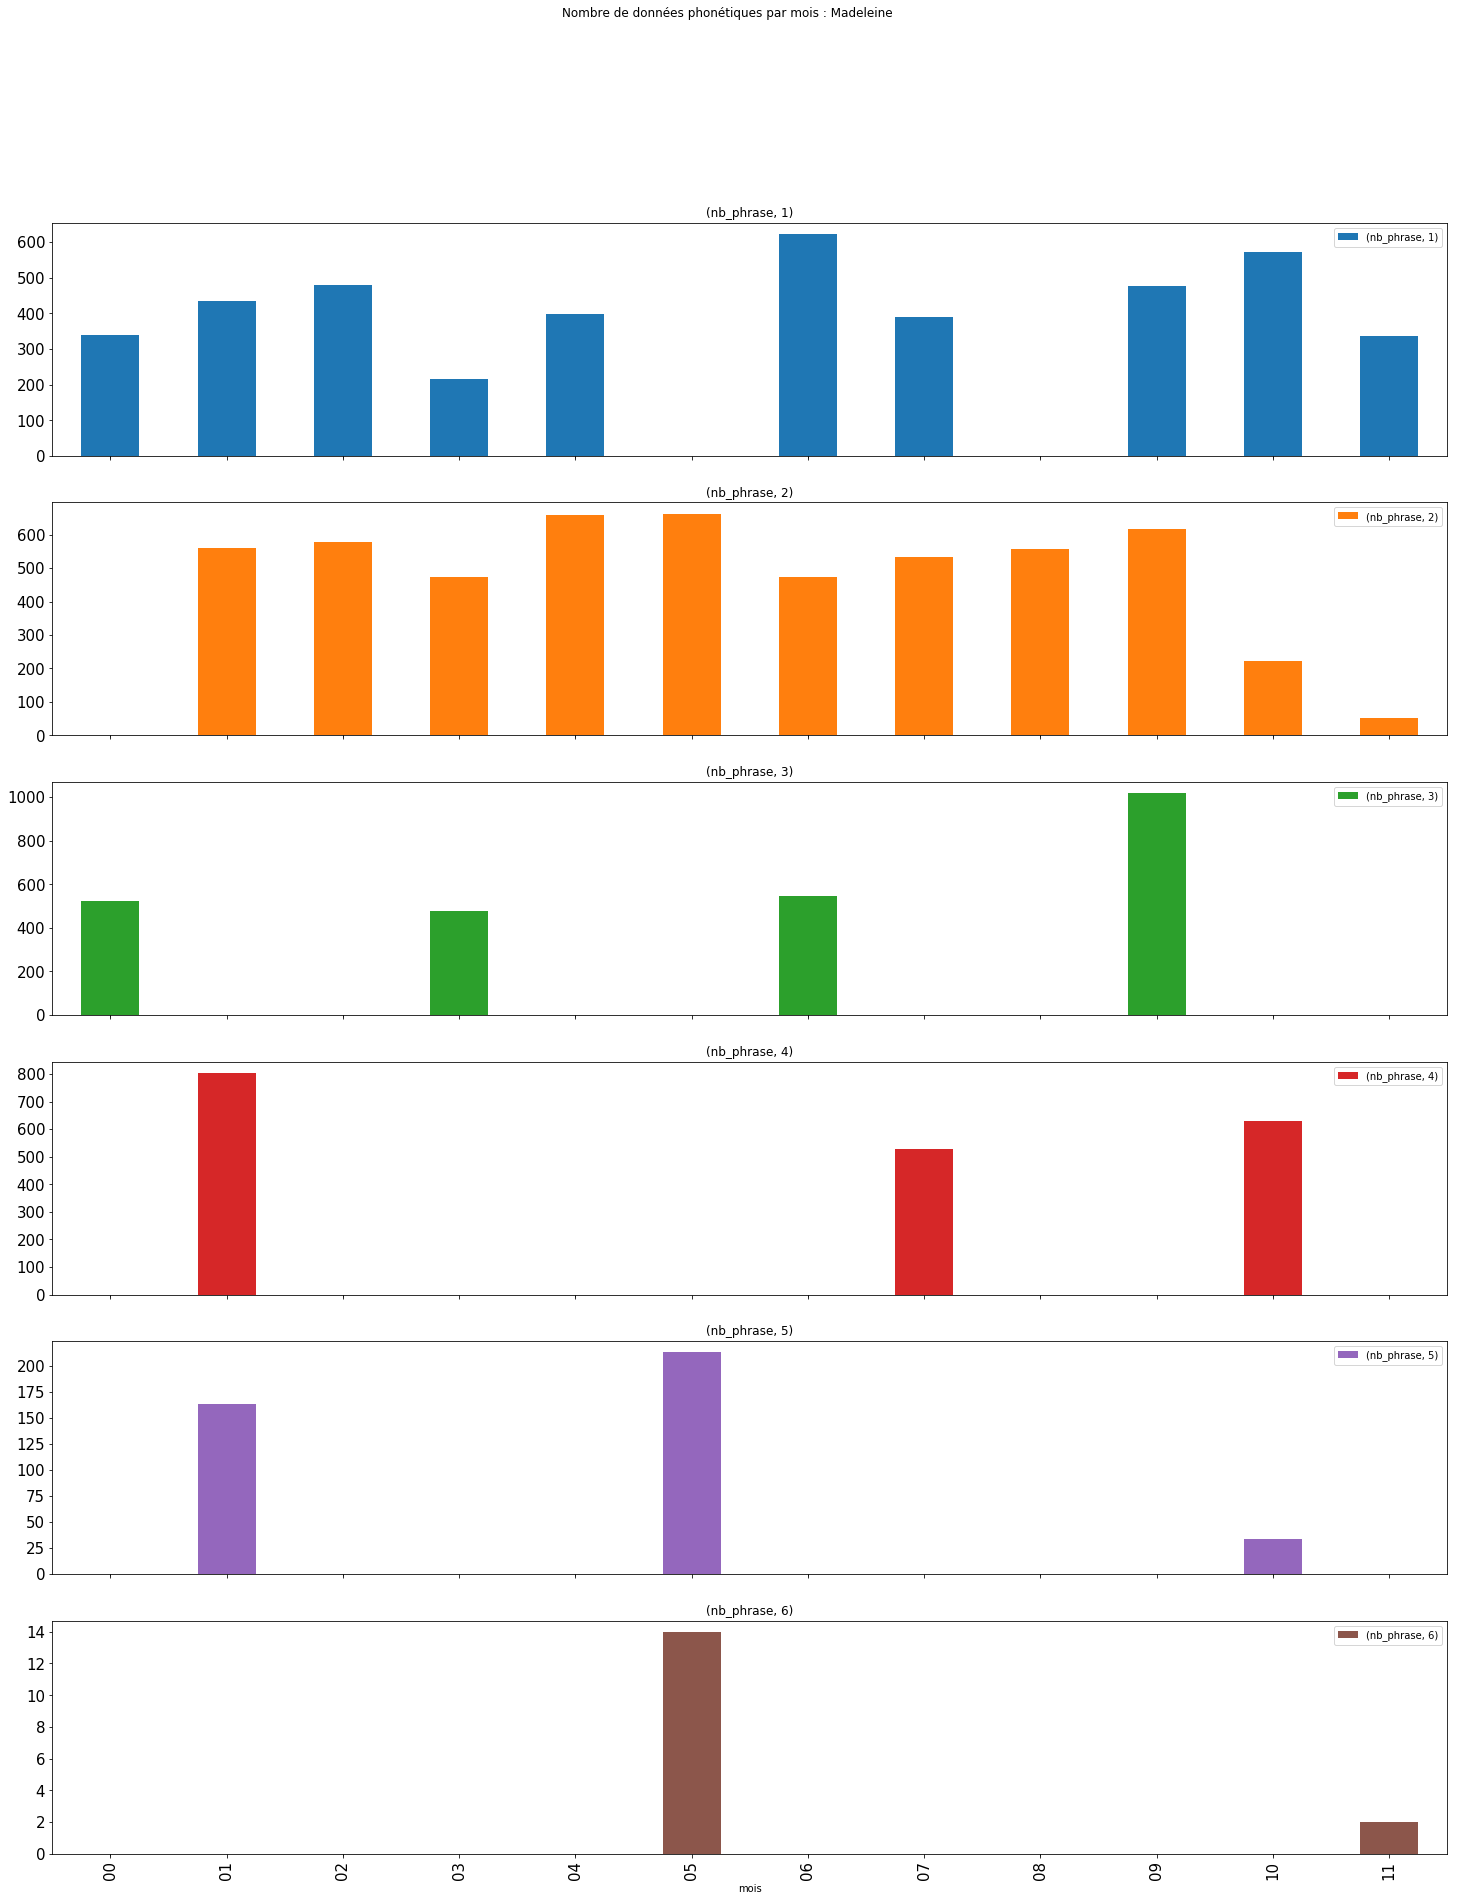

In [0]:
plt = nb_phrase_mois.unstack(level=0).plot(kind='bar', 
                                     subplots=True, 
                                     figsize=(25, 30),
                                     title = 'Nombre de données phonétiques par mois : Madeleine',
                                     fontsize = 15,
                                     use_index = True)

En effet on voit que l'enfant fait de nombreuses interactions lors de chacun enregistrement, hormis à l'âge de 6 ans. <br>
(Il faudrait peut-être regarder si ce que l'enfant a dit à cet âge-là a été traduit en phonétique)

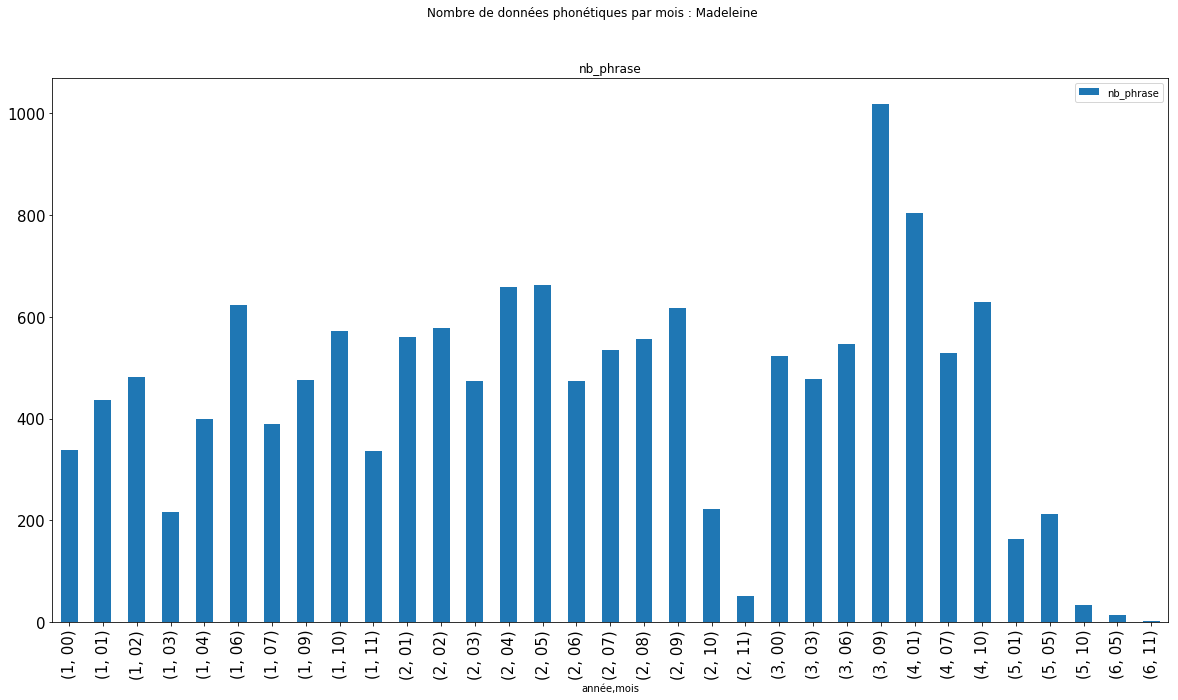

In [0]:
plt = nb_phrase_mois.plot(kind='bar',
                    subplots=True, 
                    figsize=(20, 10),
                    title = 'Nombre de données phonétiques par mois : Madeleine',
                    fontsize = 15,
                    use_index = True)

Cette visualisation regroupe toutes les informations commentées ci-dessus.

### Quantité de données par jour

Regardons maintenant la quantité de données par jours :

In [0]:
nb_phrase_jour = pho_madeleine[{'année','mois', 'jour', 'contenu'}].groupby(['année','mois', 'jour']).count()
nb_phrase_jour = nb_phrase_jour.rename(columns={'contenu': 'nb_phrase'})
nb_phrase_jour

nb_phrase
année mois jour           
1     00   05          339
      01   10          436
      02   14          278
           28          203
      03   18          217
      04   18          399
      06   04          623
      07   15          390
      09   03          476
      10   07          572
      11   13          337
2     01   02          561
      02   06          578
      03   05          474
      04   15          659
      05   12          663
      06   10          474
      07   07          534
      08   05          556
      09   16          618
      10   20          222
      11   19           51
3     00   28          523
      03   02          478
      06   08          547
      09   07          571
           28          447
4     01   27          805
      07   04          528
      10   03          629
5     01   05          163
      05   08          213
      10   16           34
6     05   14           14
      11   27            2

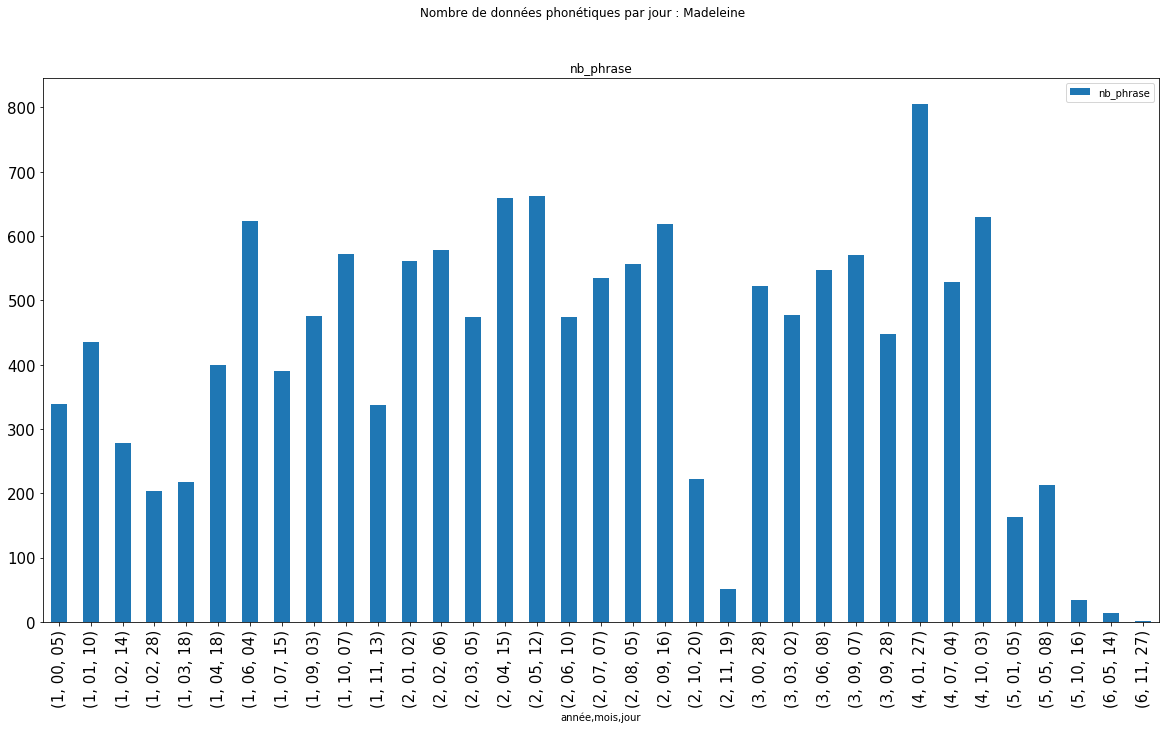

In [0]:
plt = nb_phrase_jour.plot(kind='bar',
                    subplots=True,
                    figsize=(20, 10),
                    title = 'Nombre de données phonétiques par jour : Madeleine',
                    fontsize = 15,
                    use_index = True)

Ici nous avons découpé les données de tel sorte à avoir la quantité de données pour chaque enregistrement de Madeleine. Mais elles ne sont pas distribué de manière équitable dans le temps. On peut mesurer la croissance du nombre de prise de parole (on pourrait croiser cette donnée avec la durée de l'enregistrement pour une meilleure mesure). <br>
Les quantites de donnnees phonetiques pour les ages ci-dessous, sont tres faibles:
* 2_11_19
* 5_10_16
* 6_05_14
* 6_11_27

On a maintenant une meilleure vision du nombre de la quantité de données phonétiques à disposition et de leur répartition dans le temps pour Madeleine.

## Nombre de mot
Nous allons chercher à explorer le nombre de mot au sens phonétique par phrase. <br>
Pour cela on peut compter le nombre d'espace dans la chaîne de caractère :

In [0]:
# Exemple 
pho = pho_madeleine.at[103508, 'contenu']
print('Nombre de mot dans "' + pho + ' : '+ str(pho.count(' ')+1))

Nombre de mot dans "mɛ̃tnɑ̃ vø ekʁiʁ kom : 4


Pour chaque ligne on calcul le nombre de mot phonétique :

In [0]:
nb_mot_pho = pho_madeleine.apply(lambda row: row['contenu'].count(' ')+1, axis=1)
pho_madeleine['nombre_mot_phonétique'] = nb_mot_pho #On ajoute une colonne contenant le nombre de mot

Par exemple on peut avoir la phrase de Madeleine avec le plus grand nombre de mot :

In [0]:
pho_madeleine.loc[pho_madeleine['nombre_mot_phonétique'] == pho_madeleine['nombre_mot_phonétique'].max()].contenu.values


array(['dabɔʁ ty sɛ œm œm l ot fwa maʁi e mɔ̃ papa i zetɛ ale aʃte ty sɛ i zetɛ ale aʃ a gugini i zetɛ ale aʃte œm ɛ̃ paʁk me me avɛk ɛ̃ ɛ̃ de de sɔʁ de pœ avɛk ɛ̃ ɛ̃ tapi ɑ̃ ɑ̃ ɑ̃ sɔʁ ɛ̃ː pœzl'],
      dtype=object)

Voici la ligne de cette phrase :

In [0]:
pho_madeleine.loc[pho_madeleine['nombre_mot_phonétique'] == pho_madeleine['nombre_mot_phonétique'].max()]

,enfant,age,type,seconde_debut,seconde_fin,contenu,année,mois,jour,nombre_mot_phonétique
76477,MADELEINE,3_06_08,pho,NaN,NaN,dabɔʁ ty sɛ œm œm l ot fwa maʁi e mɔ̃ papa i z...,3,06,08,51


### Espérance de mot par phrase

In [0]:
mean_nb_mot_pho_madeleine_jour = pho_madeleine[{'année', 'mois', 'jour', 'nombre_mot_phonétique'}].groupby(['année', 'mois', 'jour']).mean()
mean_nb_mot_pho_madeleine_jour = mean_nb_mot_pho_madeleine_jour.rename(columns={'nombre_mot_phonétique': 'espérance_nombre_de_mot_phonétique'})
mean_nb_mot_pho_madeleine_jour

espérance_nombre_de_mot_phonétique
année mois jour                                    
1     00   05                              1.265487
      01   10                              1.098624
      02   14                              1.169065
           28                              1.354680
      03   18                              1.423963
      04   18                              1.503759
      06   04                              1.738363
      07   15                              1.805128
      09   03                              2.123950
      10   07                              2.426573
      11   13                              2.884273
2     01   02                              3.117647
      02   06                              3.747405
      03   05                              3.833333
      04   15                              4.057663
      05   12                              4.447964
      06   10                              3.219409
      07   07                              5.215356
      08   05                              4.741007
      09   16                              4.656958
      10   20                              4.635135
      11   19                              6.156863
3     00   28                              5.043977
      03   02                              4.966527
      06   08                              4.908592
      09   07                              4.260946
           28                              4.760626
4     01   27                              5.474534
      07   04                              6.962121
      10   03                              3.314785
5     01   05                              2.717791
      05   08                              3.253521
      10   16                              3.705882
6     05   14                              4.285714
      11   27                              1.000000

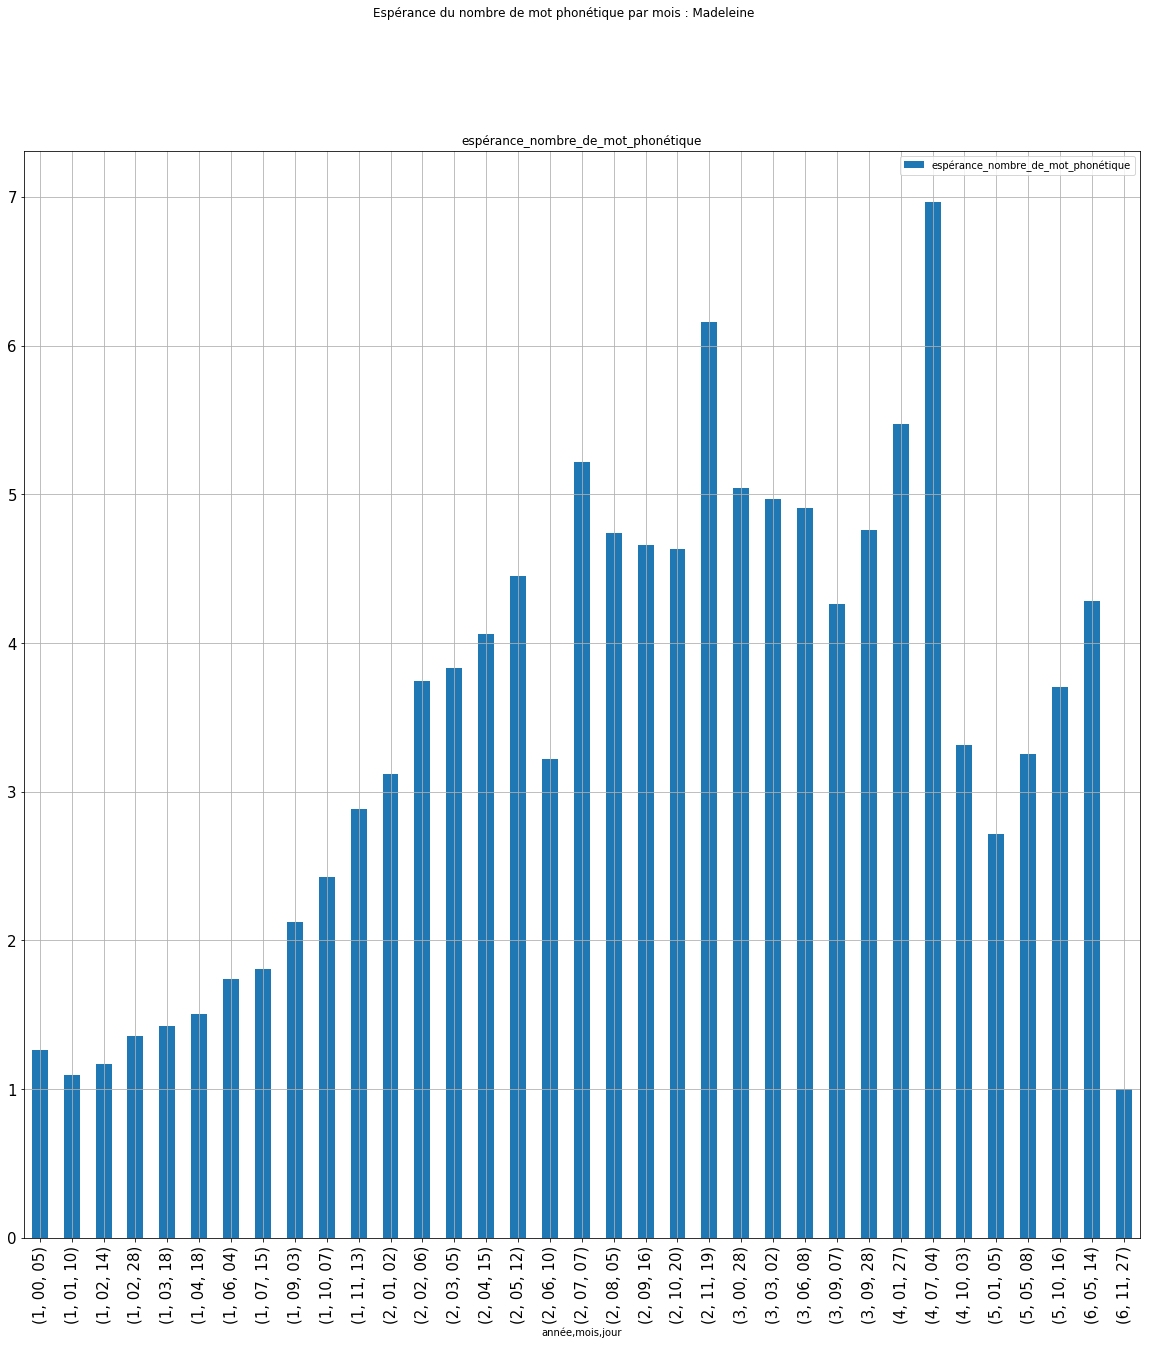

In [0]:
mean_nb_mot_pho_madeleine_jour.plot(kind='bar', 
                            subplots=True, 
                            figsize=(20, 20),
                            title = 'Espérance du nombre de mot phonétique par mois : Madeleine',
                            fontsize = 15,
                            use_index = True,
                            grid=True);

* On constaste que l'espérance a tendance a augmenter au fil du temps
* L'esperance pour l'age 4_07_04 est exessivement élevée 

### Variance du nombre de mot par phrase

In [0]:
var_nb_mot_pho_madeleine = pho_madeleine[{'année','mois','nombre_mot_phonétique'}].groupby(['année','mois']).var()
var_nb_mot_pho_madeleine = var_nb_mot_pho_madeleine.rename(columns={'nombre_mot_phonétique': 'variance'})
var_nb_mot_pho_madeleine.unstack(level=1)

variance                                                        \
mois          00         01        02         03         04         05   
année                                                                    
1       0.568362   0.139676  0.515748   0.699053   1.054634        NaN   
2            NaN   4.743277  7.728113  11.538760  10.692719  12.507485   
3      14.635993        NaN       NaN  20.007263        NaN        NaN   
4            NaN  18.518318       NaN        NaN        NaN        NaN   
5            NaN   2.932212       NaN        NaN        NaN   7.982594   
6            NaN        NaN       NaN        NaN        NaN  15.142857   

                                                                        
mois          06         07        08         09         10         11  
année                                                                   
1       1.569700   1.154729       NaN   1.477236   3.078662   4.055020  
2       7.038439  13.546405  16.97064  11.762196  18.603828  35.054902  
3      22.980640        NaN       NaN  16.538945        NaN        NaN  
4            NaN  25.474843       NaN        NaN  12.528141        NaN  
5            NaN        NaN       NaN        NaN   8.759358        NaN  
6            NaN        NaN       NaN        NaN        NaN   0.000000

### Plus grande phrase 

In [0]:
max_mot_pho_madeleine = pho_madeleine[{'année','mois','nombre_mot_phonétique'}].groupby(['année','mois']).max()
max_mot_pho_madeleine = max_mot_pho_madeleine.rename(columns={'nombre_mot_phonétique': 'longueur_max'})
max_mot_pho_madeleine.unstack(level=1)

longueur_max                                                        \
mois            00    01    02    03    04    05    06    07    08    09   
année                                                                      
1              7.0   4.0   9.0   6.0  11.0   NaN  13.0   9.0   NaN   8.0   
2              NaN  18.0  28.0  30.0  23.0  30.0  16.0  21.0  28.0  20.0   
3             29.0   NaN   NaN  34.0   NaN   NaN  51.0   NaN   NaN  37.0   
4              NaN  42.0   NaN   NaN   NaN   NaN   NaN  27.0   NaN   NaN   
5              NaN  10.0   NaN   NaN   NaN  17.0   NaN   NaN   NaN   NaN   
6              NaN   NaN   NaN   NaN   NaN  13.0   NaN   NaN   NaN   NaN   

                   
mois     10    11  
année              
1      15.0  15.0  
2      27.0  31.0  
3       NaN   NaN  
4      47.0   NaN  
5      14.0   NaN  
6       NaN   1.0

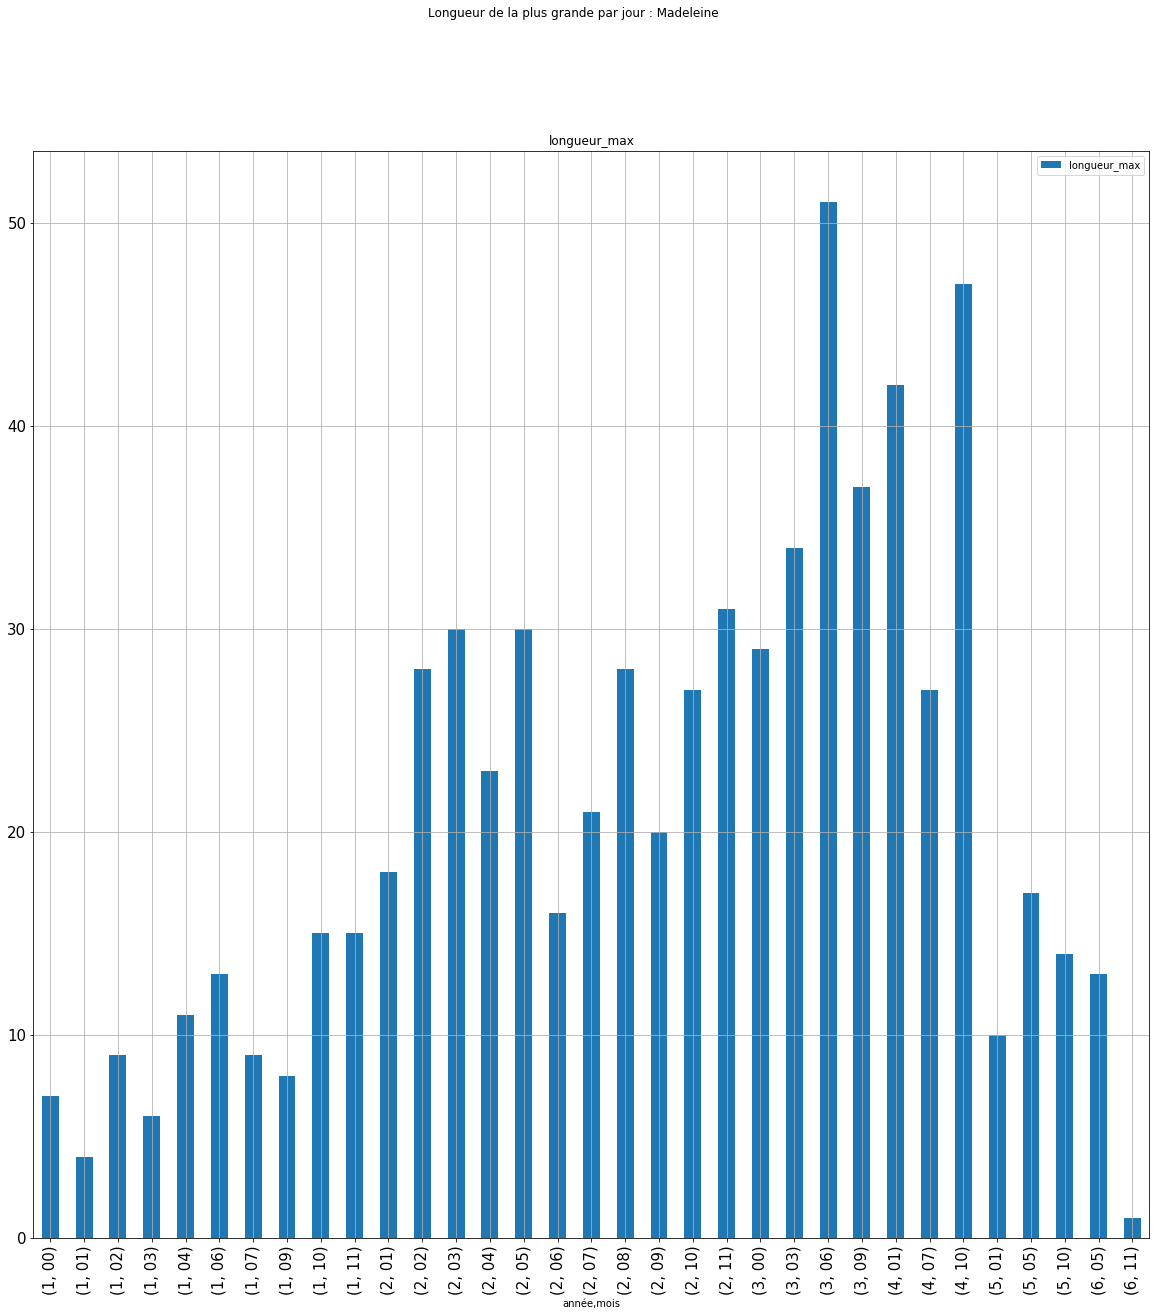

In [0]:
max_mot_pho_madeleine.plot(kind='bar', 
                            subplots=True, 
                            figsize=(20, 20),
                            title = 'Longueur de la plus grande par jour : Madeleine',
                            fontsize = 15,
                            use_index = True,
                            grid=True);

On note une que la longueur de la plus longue phrase par enregistrement évolue jusqu'à ses 3 ans, ensuite elle ne fluctue plus beaucoup. <br>
Remarque: le fait que l'enfant effectue une longue prhase signifie pas forcement que celle-ci a un sens